Hooke's Law states that the Force required in order to compress or stretch a spring is equal to the sitfness of the spring (k) and the distance stretch distance (x), so the total distance a spring stretches is the stretch minus its length:

$F(r)=-k(r-l_0)$

We define the position vector as:

$r=\sqrt{x^2+y^2}$

and its direction ($\hat{x}$) as $\frac{x}{\sqrt{x^2+y^2}}$

so: 

\begin{equation}
    F_x=-k(\sqrt{x^2+y^2}-l_0)(\frac{x}{\sqrt{x^2+y^2}}) \Rightarrow
    F_x=-k(\sqrt{x^2+y^2}-l_0)\hat{x}
\end{equation}

A simple way to visualiza how will the mass attached to the spring behave in the surrounding space, is to build a vector field graph:

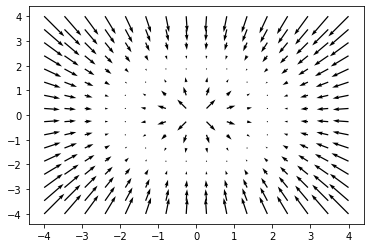

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
x,y = np.meshgrid(np.linspace(-4,4,16),np.linspace(-4,4,16))
k=5
length=2
Fx =-k*(np.sqrt((x**2)+(y**2))-length)*(x/(np.sqrt(x**2 + y**2)))
Fy =-k*(np.sqrt((x**2)+(y**2))-length)*(y/(np.sqrt(x**2 + y**2)))

VG=plt.quiver(x,y,Fx,Fy)
VG

It's easy to see where will the mass move if place in certain coordinates in the grid.

Let's place some initial conditions and solve the differential equation with eulers method:

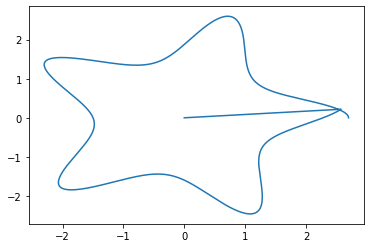

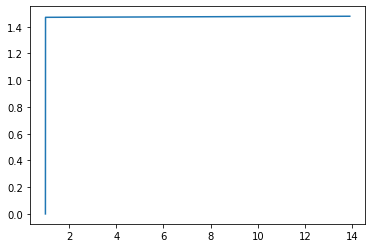

In [25]:
m=1# object mass
tf=12.9 #final time simulation
n=100000  #iterations
h=tf/n  #step
t = np.zeros(n)#time array
t[0]=1 #initial time
# position in x and y arrays
X=np.zeros(n+1)
Y=np.zeros(n+1)
X[0]=2.7 #initial position x
Y[0]=0 #initial position y
# Velocity in x and y arrays
vx=np.zeros(n+1)
vy=np.zeros(n+1)
vx[0]=0 #initial condition x velocity
vy[0]=.7 #initial condition y velocity
Emtot=np.zeros(n) #we create a initial total mechanic energy in order to calculate it in the loop
Emtot[0]=0 

for i in range(0,n):
   #solve spring-mass differential equation with euler method
    try:
       t[i+1]=t[i]+h
    except:
        continue
    vx[i+1]=vx[i]+(-k*(np.sqrt(X[i]**2+Y[i]**2)-length)*(X[i]/np.sqrt(X[i]**2+Y[i]**2))/m)*h
    vy[i+1]=vy[i]+(-k*(np.sqrt(X[i]**2+Y[i]**2)-length)*(Y[i]/np.sqrt(X[i]**2+Y[i]**2))/m)*h
    X[i+1]=X[i]+vx[i]*h
    Y[i+1]=Y[i]+vy[i]*h
    #It is possible to prove the conservation of mechanic energy by calculating the total energy (kinetic + potential energy) each iteration:
    ##In order to calculate the kinetic energy, we need the mangitude of the velocity each iteration:
    Vmag=np.sqrt(vx[i]**2+vy[i]**2)
    ##Kinetic energy formula:
    Kenergy=0.5*m*(Vmag**2)
    ##In order to calculate the potential energy, we need the mangitude of the position vector each iteration:
    Rmag=np.sqrt(X[i]**2+Y[i]**2)
    ##Potential energy formula:
    Penergy=0.5*k*(Rmag-length)**2
    #Total energy each iteration:
    Emtot[i+1]=Penergy+Kenergy
    #We can add a disipative force proportional to the velocity (friction) UNCOMMENT this section to apply it
    # f=0.0000491 #dissipative force constant
    # vx[i+1]=vx[i+1]-f*vx[i+1]
    # vy[i+1]=vy[i+1]-f*vy[i+1]
    #When we add friction, the energy no longer remains the same and ends up being zero.
#trajectory plot
plt.plot(X,Y)
plt.show()
#energy vs time plot
plt.plot(t,Emtot)



We can overlap the trajectory plot over the vector field and obtain a very nice visualization of the phenomena.

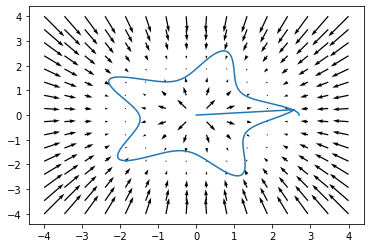

In [26]:
plt.plot(X,Y)
plt.quiver(x,y,Fx,Fy)
plt.show()